# **Practical Lecture Part**

# *Neural Networks in Keras*

#  Preparation: **Necessary Tools** 





In [1]:
import numpy as np        
import matplotlib.pyplot as plt 
import random                   

from keras.datasets import mnist     
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils

# Preparation: **Training & Test Data**





#### Preparation: **Loading the training data**

To train the neural network we're going to configure, we need training and test data.

Training data is a collection of examples based on which the network's parameters will be adjusted while learning. The test data is used to evaluate the performance of the model after it has been trained.

In [3]:
# Load data from MNIST dataset into separate variables (images & labels)
(data_training_images, data_training_labels), (data_test_images, data_test_labels) = mnist.load_data()

print("data_training_images shape", data_training_images.shape)
print("data_training_labels shape", data_training_labels.shape)

print("data_test_images shape", data_test_images.shape)
print("data_test_labels shape", data_test_labels.shape)


11501568/11490434 [==============================] - 0s 0us/step
data_training_images shape (60000, 28, 28)
data_training_labels shape (60000,)
data_test_images shape (10000, 28, 28)
data_test_labels shape (10000,)


We are going to work with the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). 

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" >

It is a publically available database which contains 70 000 sets (60 000 for training, 10 000 for testing) of greyscale images of handwritten digits and their corresponding labels (a value between 0 and 9, denoting which number the image shows). All images have been normalized to a size of 28×28 pixels

Each dataset (training and testing) is comprised of two arrays, one containing the images, one containing the labels. An image and it's label are associated with each other by their index (their position) in the array they are contained in, respectively.

<img src="https://i.imgur.com/28mxTr6.gif" >

We can take a look at some of the training data by plotting the RGBA values of an image contained in the data.

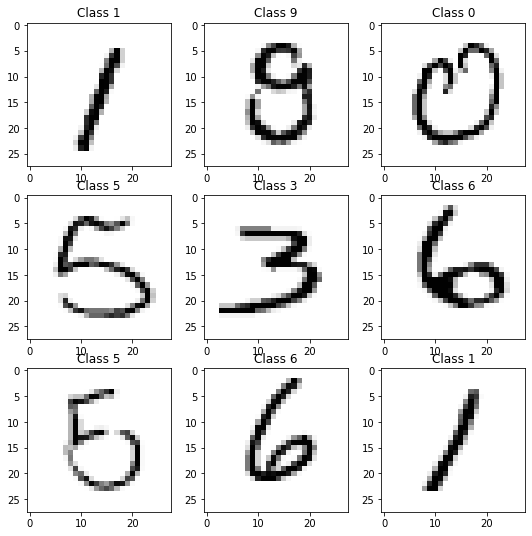

In [5]:
plt.rcParams['figure.figsize'] = (9,9) 

# Set up a loop to draw 9 images
for i in range(9):

    # Add a sub-pot (size & position) to draw the image in
    plt.subplot(3,3,i+1)

    # Generate a random number in a range from 0 to the total count of training data
    num = random.randint(0, len(data_training_images))

    # Fetch the training data at the index euqalto the rand. generated number 
    plt.imshow(data_training_images[num], cmap='Greys', interpolation='none')

    # Add a label to the sub-plot
    plt.title("Class {}".format(data_training_labels[num]))

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [6]:
# Function to print values of a matrix
def matprint(matrix, fmt="g"):

  column_max = [max(
    [len(("{:"+fmt+"}").format(x)) for x in column]
  ) for column in matrix.T]
   
  for x in matrix:
      for i, y in enumerate(x):
          print(("{:"+str(column_max[i])+fmt+"}").format(y), end="  ")
      print("")

# Generate a random number
num = random.randint(0, len(data_training_images))

# Use the number to fetch an image from the training data
data_sample = data_training_images[num] 

# Use the data-sample as an argument in the matrix-printing function
matprint(data_sample)

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   12   13    5    0    9   13  0  0  0  


# Building a Network: **Preparing the input data** (20 min)

#### **Formatting the input data**

The way the neural network we're build works, we need to be able to access the individual pixels of the images. 

To do so, we need to re-format (or flatten) the original data, creating a vector with a length of 784 for each image. The vector will hold the greyscale-value of each of the respective image's pixels.

<img src="https://i.imgur.com/MSENHaL.png" >

As is, the pixel data of each image is represented in a 28×28 matrix. By flatting an image, we convert this matrix into a linear sequence of values, contained in a vetor.

<img src="https://i.imgur.com/JsZHhXs.jpg" >

In [7]:
data_training_images = data_training_images.reshape(60000, 784)   # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
data_test_images = data_test_images.reshape(10000, 784)           # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.


Initially, the pixel values extracted from each image are represented on a range of 1-255, due to the hexadecimal encoding of JPEG images. To make these values easier to work with and compatible with other data, it's helpful to normalize them. We'll need to format each value to fit a scale of 0 to 1, 0 being a pixel without any greyscale value (white) and 1 being a pixel with the maximum greyscale value (black). 

<img src="https://i.imgur.com/uTwGBAP.png" >



In [8]:
data_training_images = data_training_images.astype('float32')     # change integers to 32-bit floating point numbers
data_test_images = data_test_images.astype('float32')

data_training_images /= 255                                       # normalize each value for each pixel for the entire vector for each input
data_test_images /= 255

#### **Setting up the labels (classes)**

In [9]:
number_classes = 10

# Convert the vector of a piece of training data into a binary matrix
data_training_labels_matrix = np_utils.to_categorical(data_training_labels, number_classes)
data_test_labels_matrix     = np_utils.to_categorical(data_test_labels, number_classes)

print(data_training_labels)
print(data_training_labels_matrix)

print(data_training_labels.shape)
print(data_training_labels_matrix.shape)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000,)
(60000, 10)


# Building a Network: **Setting up the layer structure**





In [10]:
model = Sequential()

##### **First layer**

In [11]:
model.add(Dense(512, input_shape=(784,)))

The first hidden layer is a set of 512 nodes (artificial neurons). Each neuron will receive a value from each element in the input layer. 

<img src="https://i.imgur.com/lLnGANQ.gif" >

Each connection from the input layer to the first layer has a **weight** assigned to it. This weight is send along with the respective input-neuron's value (the pixel's grayscale value) to each of the corresponding neuron in the hidden layer.

<img src="https://i.imgur.com/tgILof3.jpg" />

The neurons in the hidden layer are essentially abstract representations of a function. This function takes each input-value a neuron receives, multiplied by the associated weight, and adds them up, resulting in the **weighted sum** of the receiving neuron's input.

<img src="https://i.imgur.com/Eowg0aE.jpg" />

In [12]:
model.add(Activation('relu'))

The weighted sum is then handed as an argument to the network's **activation function**. Our network uses the Rectified Linear Unit function (ReLU). This function determines whether the neuron has fired or not, by converting all negative inputs (i.e. when the sum of the input-neuron's grayscale-value multiplied by its weight is less than zero) to zero, while leaving positive inputs unchanged. 

The bias is added to the weighted sum before it is passed to the activation function. The bias is a number which regulates the threshold which a neuron's activation needs to pass in order to be considered »active« or »firing«. Finally, the function returns a value between 0 and 1, representing the degree to which the neuron is firing.


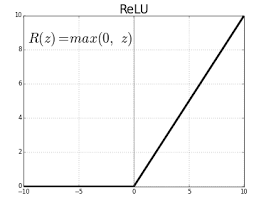

In [13]:
model.add(Dropout(0.2))

Dropout zeroes a selection of random outputs (i.e., disables their activation). Dropout helps protect the model from memorizing or "overfitting" the training data.


##### **Second layer**

The second hidden layer appears identical to our first layer. However, instead of each of the 512-node receiving 784-inputs from the input image data, they receive 512 inputs from the output of the first 512-node layer.


In [14]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

<img src="https://i.imgur.com/5TSEkK3.jpg" />

##### **The output layer**

<img src="https://i.imgur.com/KcMT1Ht.jpg" />

The final layer of 10 neurons in fully-connected to the previous 512-node layer. The final layer of a FCN should be equal to the number of desired classes (10 in this case).

In [15]:
model.add(Dense(10))

The »softmax« activation represents a probability distribution over K different possible outcomes. Its values are all non-negative and sum to 1.

In [16]:
model.add(Activation('softmax'))

At the end of this process, the model needs to be summarized.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

#### **Compiling the model**

Categorial Crossentopy and Adam Optimizer will be discussed in the lecture.

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### **Training the model**

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [19]:
model.fit(data_training_images, data_training_labels_matrix,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.2482 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1032 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0730 - accuracy: 0.9767
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0577 - accuracy: 0.9814
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0463 - accuracy: 0.9845


# Building a Network: **Evaluating the model with test data**

In [20]:
score = model.evaluate(data_test_images, data_test_labels_matrix)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0723 - accuracy: 0.9785
Test score: 0.07232873886823654
Test accuracy: 0.9785000085830688
